# Bootcamp Data Science Aplicada - Alura

# Módulo 3 - Análise e Previsão de Séries Temporais

Notebook para o acompanhamento das aulas e resoluções dos desafios propostos. Caso necessário, dividirei em mais de um notebook.

## Importação das Bibliotecas

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

import warnings
warnings.filterwarnings('ignore')

# Aula 01 - Entendendo a Série Temporal

In [2]:
dados = pd.read_csv('../data/dados_covid_sp.csv', sep = ';')

In [3]:
dados.head()

nome_munic  codigo_ibge  dia  mes    datahora  casos  casos_novos  \
0        Adamantina      3500105   25    2  2020-02-25      0            0   
1            Adolfo      3500204   25    2  2020-02-25      0            0   
2             Aguaí      3500303   25    2  2020-02-25      0            0   
3    Águas da Prata      3500402   25    2  2020-02-25      0            0   
4  Águas de Lindóia      3500501   25    2  2020-02-25      0            0   

       casos_pc    casos_mm7d  obitos  ...               nome_drs cod_drs  \
0  0,000000e+00     0,0000000       0  ...                Marília       5   
1  0,000000e+00     0,0000000       0  ...  São José do Rio Preto      15   
2  0,000000e+00     0,0000000       0  ...  São João da Boa Vista      14   
3  0,000000e+00     0,0000000       0  ...  São João da Boa Vista      14   
4  0,000000e+00     0,0000000       0  ...               Campinas       3   

     pop pop_60   area  map_leg map_leg_s  latitude  longitude  semana_epidem  
0  33894   7398  41199        0       8.0  -21,6820   -51,0737              9  
1   3447    761  21106        0       8.0  -21,2325   -49,6451              9  
2  35608   5245  47455        0       8.0  -22,0572   -46,9735              9  
3   7797   1729  14267        0       8.0  -21,9319   -46,7176              9  
4  18374   3275   6013        0       8.0  -22,4733   -46,6314              9  

[5 rows x 26 columns]

In [4]:
# sns.lineplot(x = 'datahora', y = 'casos', data = dados)

In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format = '%Y-%m-%d')

- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

<AxesSubplot:xlabel='datahora', ylabel='casos'>

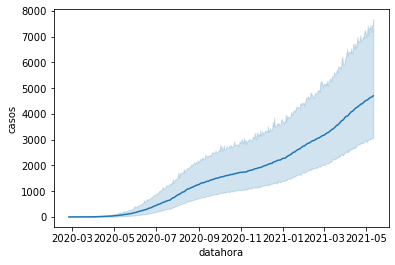

In [6]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados)

In [7]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15, 8)

In [8]:
eixo_x = np.linspace(-2, 2, 100)

In [9]:
y_exp = np.exp(eixo_x)

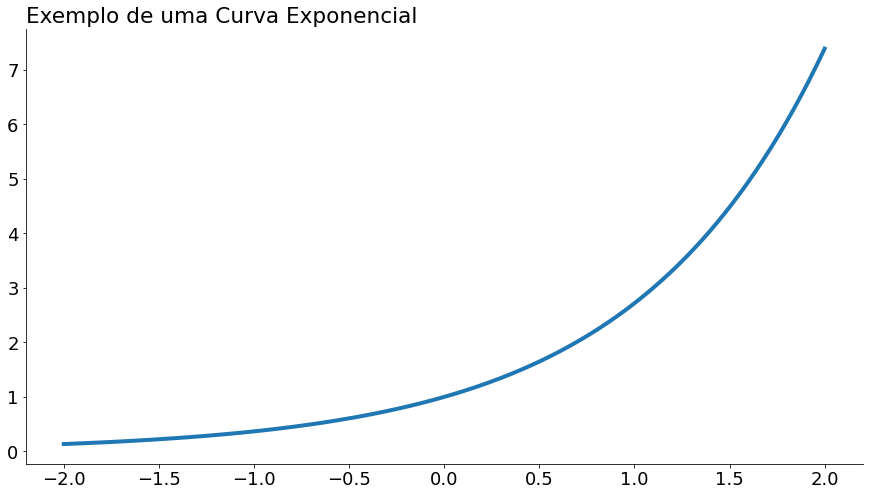

In [10]:
sns.lineplot(x = eixo_x, y = y_exp, linewidth = 4)
plt.title('Exemplo de uma Curva Exponencial', loc = 'left')
sns.despine()
plt.show()

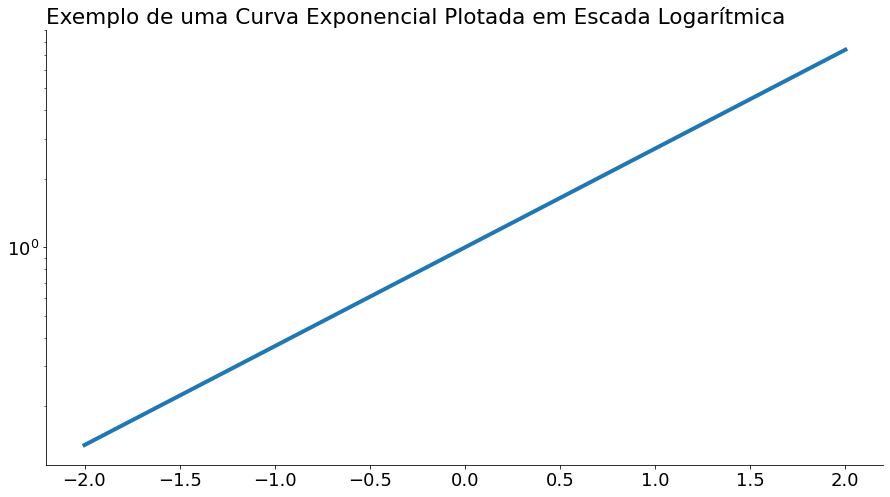

In [11]:
sns.lineplot(x = eixo_x, y = y_exp, linewidth = 4)
plt.yscale('log')
plt.title('Exemplo de uma Curva Exponencial Plotada em Escada Logarítmica', loc = 'left')
sns.despine()
plt.show()

In [12]:
dados_sp = dados.query('nome_munic == "São Paulo"')

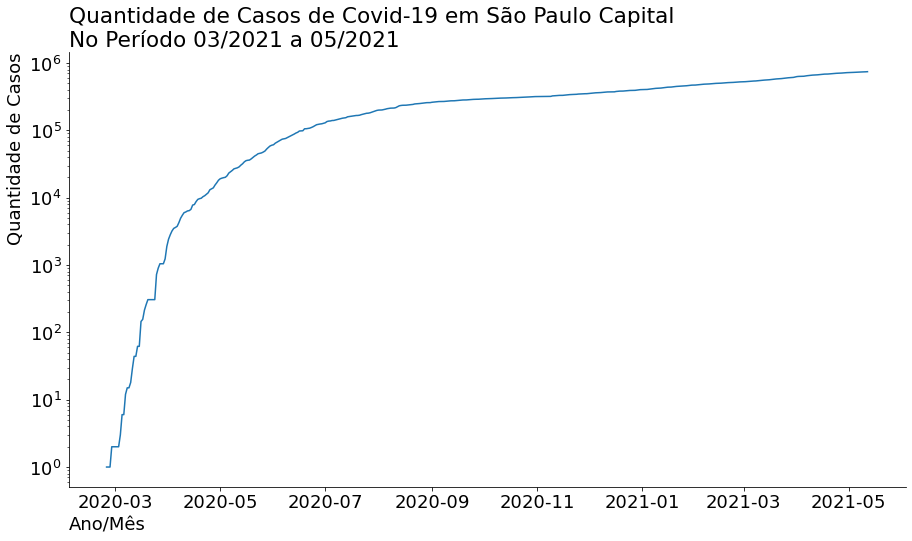

In [13]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.yscale('log') # escala logarítmica
plt.title('Quantidade de Casos de Covid-19 em São Paulo Capital\nNo Período 03/2021 a 05/2021', loc = 'left')
plt.xlabel('Ano/Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
sns.despine()
plt.show()

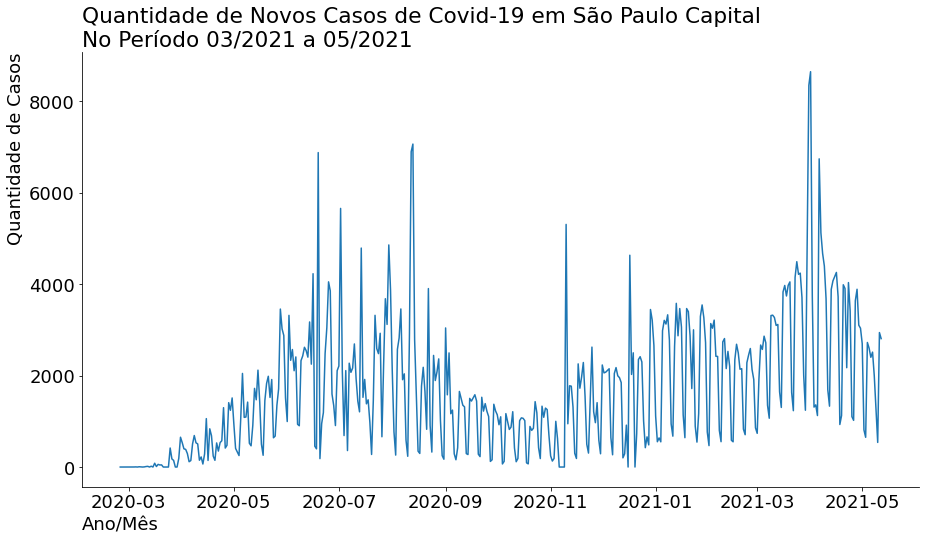

In [14]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp)
plt.title('Quantidade de Novos Casos de Covid-19 em São Paulo Capital\nNo Período 03/2021 a 05/2021', loc = 'left')
plt.xlabel('Ano/Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
sns.despine()
plt.show()

In [15]:
dados_exemplo = pd.DataFrame(data = np.linspace(1, 10, 10))

In [16]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [17]:
dados_exemplo.columns = ['coluna1']

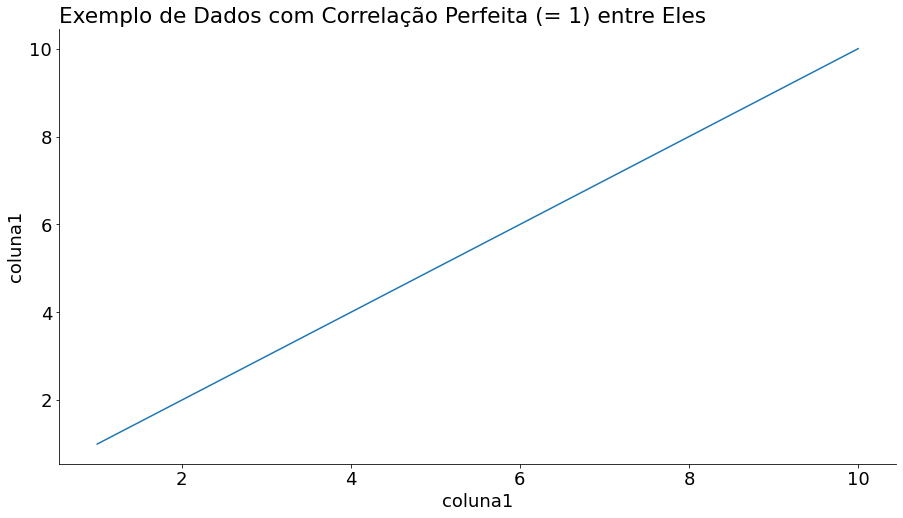

In [18]:
sns.lineplot(x = 'coluna1', y = 'coluna1', data = dados_exemplo)
plt.title('Exemplo de Dados com Correlação Perfeita (= 1) entre Eles', loc = 'left')
sns.despine()
plt.show()

In [19]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

In [20]:
dados_exemplo

coluna1  diferenciado
0      1.0           NaN
1      2.0           1.0
2      3.0           1.0
3      4.0           1.0
4      5.0           1.0
5      6.0           1.0
6      7.0           1.0
7      8.0           1.0
8      9.0           1.0
9     10.0           1.0

<AxesSubplot:xlabel='coluna1', ylabel='coluna1'>

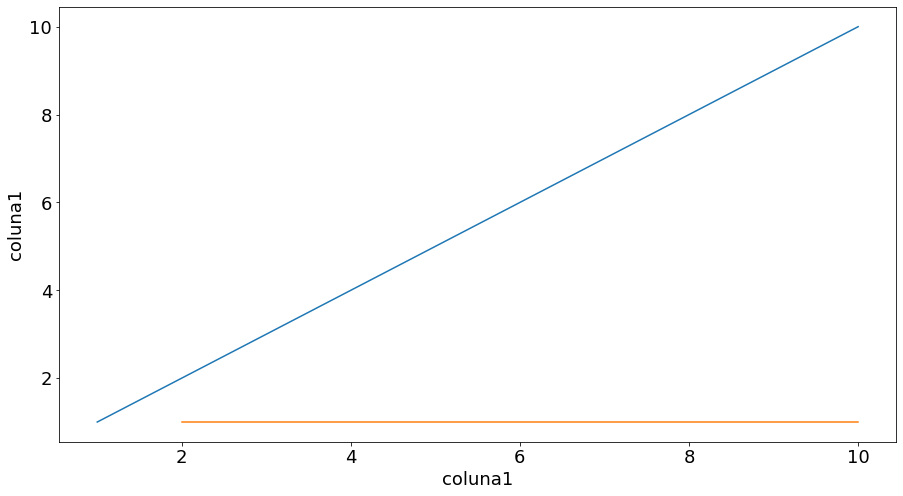

In [21]:
sns.lineplot(x = 'coluna1', y = 'coluna1', data = dados_exemplo)
sns.lineplot(x = 'coluna1', y = 'diferenciado', data = dados_exemplo)

In [22]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_casos'>

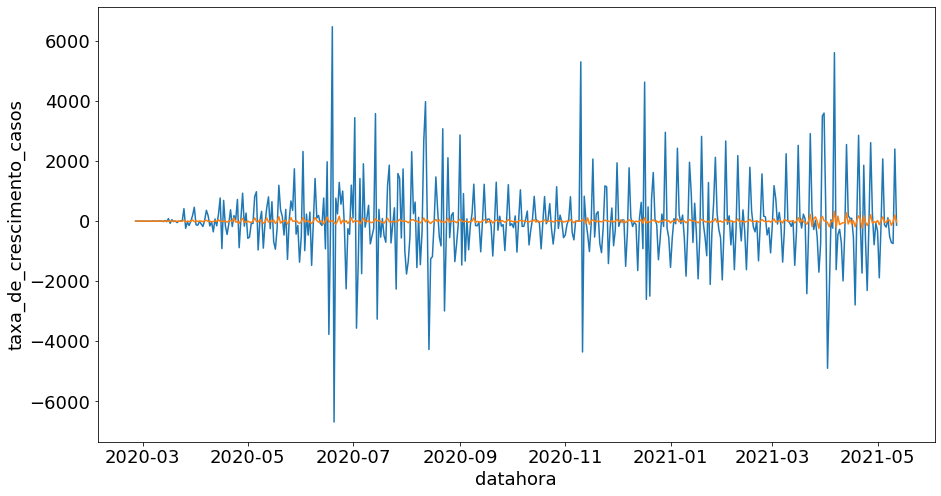

In [23]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_sp)
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_sp)

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

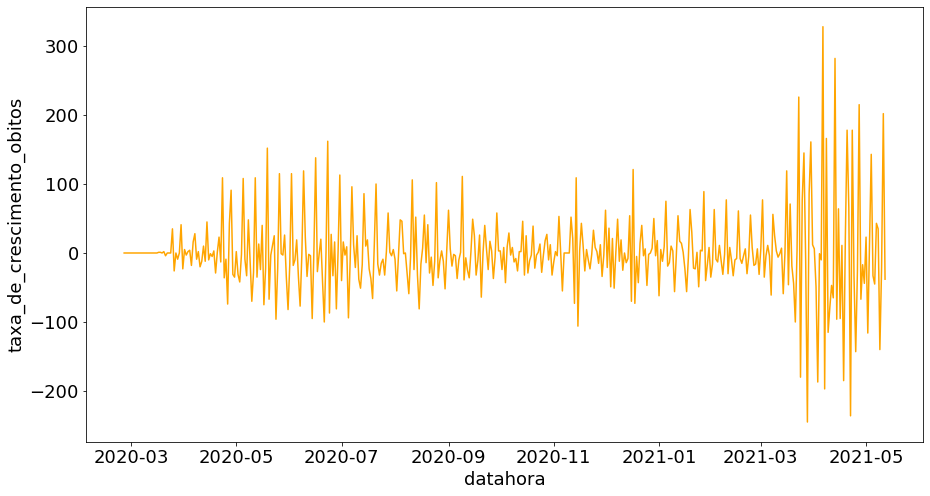

In [24]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_sp, color = 'orange')

<BarContainer object of 443 artists>

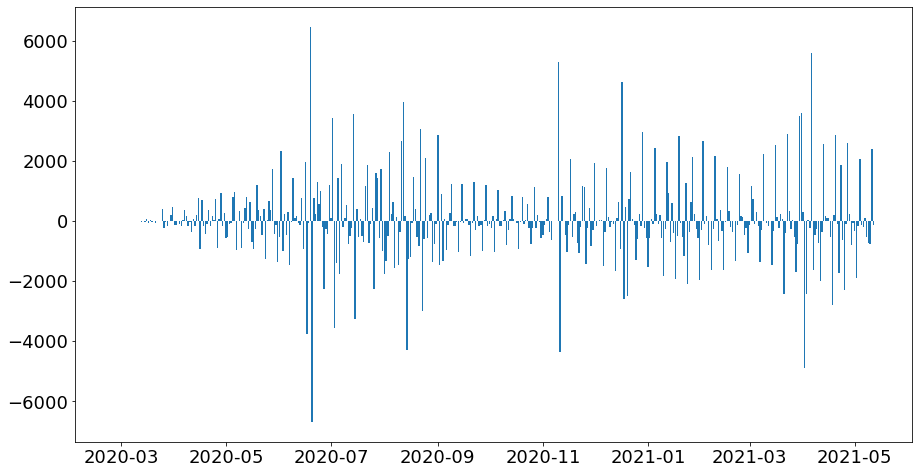

In [25]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [26]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [27]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

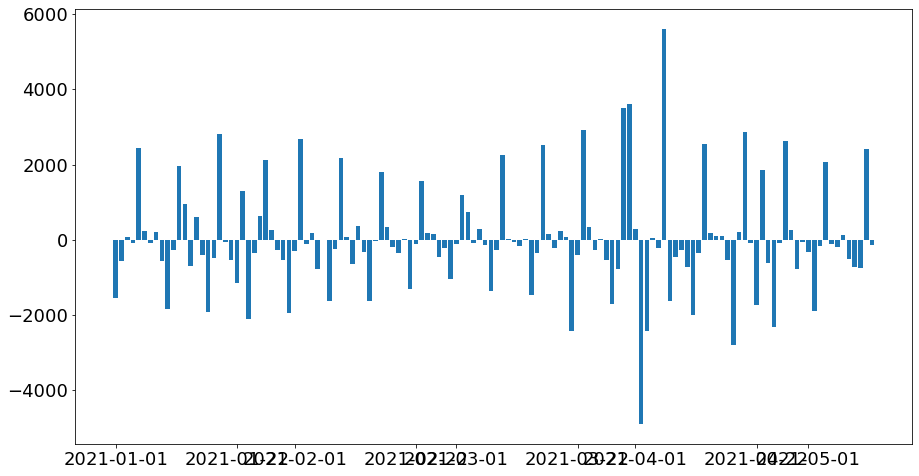

In [28]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [29]:
# média móvel
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()

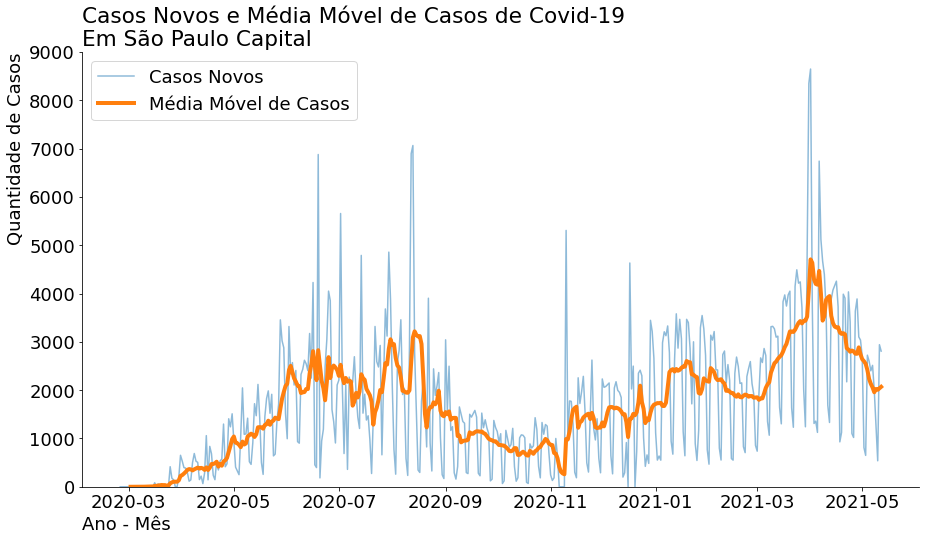

In [30]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, alpha = 0.5, linewidth = 1.5, label = 'Casos Novos')
sns.lineplot(x = 'datahora', y = 'media_movel_casos', data = dados_sp, linewidth = 4, label = 'Média Móvel de Casos')
plt.title('Casos Novos e Média Móvel de Casos de Covid-19\nEm São Paulo Capital', loc = 'left')
sns.despine()
plt.xlabel('Ano - Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
plt.ylim(0, 9000)
plt.legend()
plt.show()

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

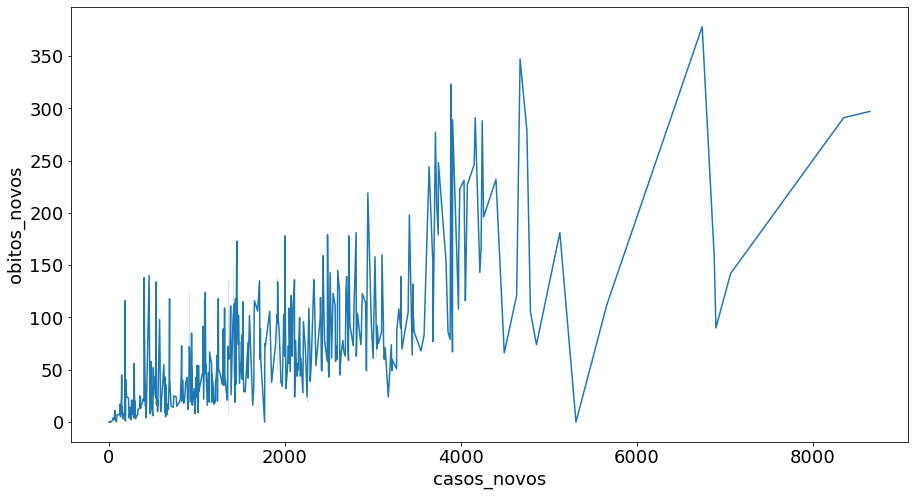

In [31]:
sns.lineplot(x = 'casos_novos', y = 'obitos_novos', data = dados_sp)

In [32]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

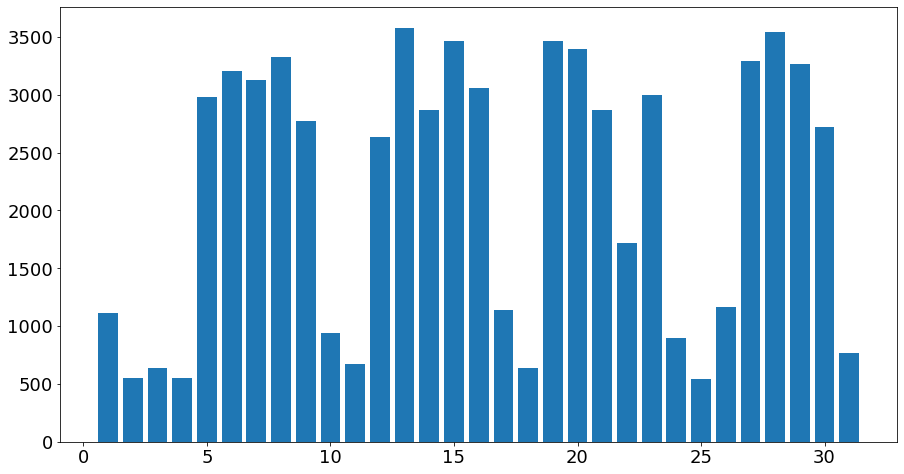

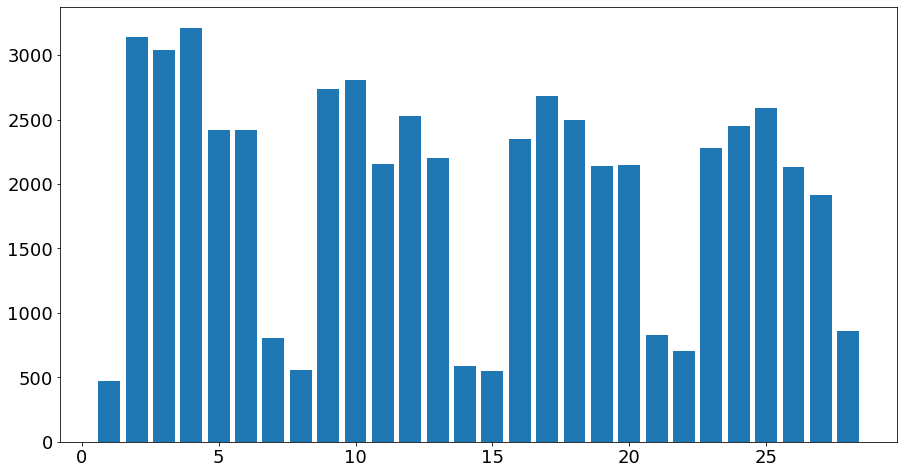

In [33]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

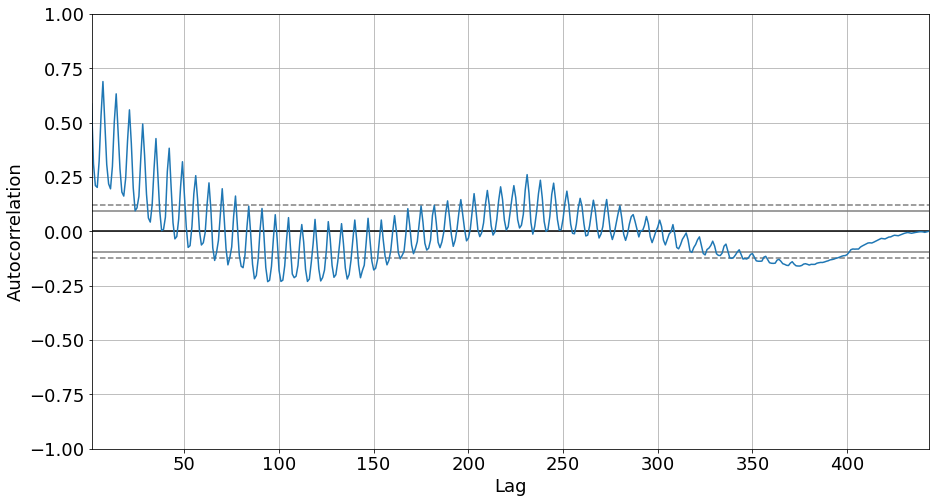

In [34]:
autocorrelation_plot(dados_sp['casos_novos'])

In [35]:
dados_sp.shape

(443, 31)

In [36]:
aleatorio = np.random.rand(443)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

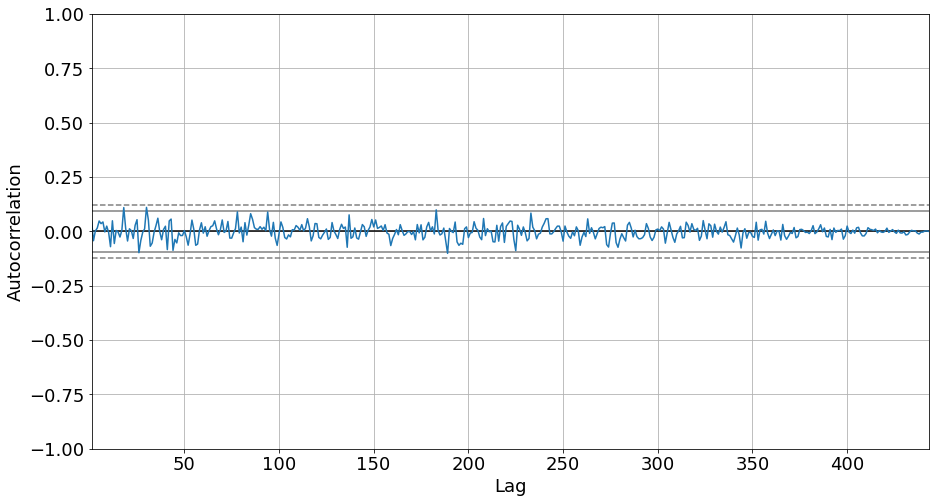

In [37]:
autocorrelation_plot(aleatorio)

## Desafio 01: Um notebook sem warnings

Para isso utilizamos:

```python
import warnings # importamos a bibioteca warnings
warnings.filterwarnings('ignore') # ignoramos os warnings
```

## Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

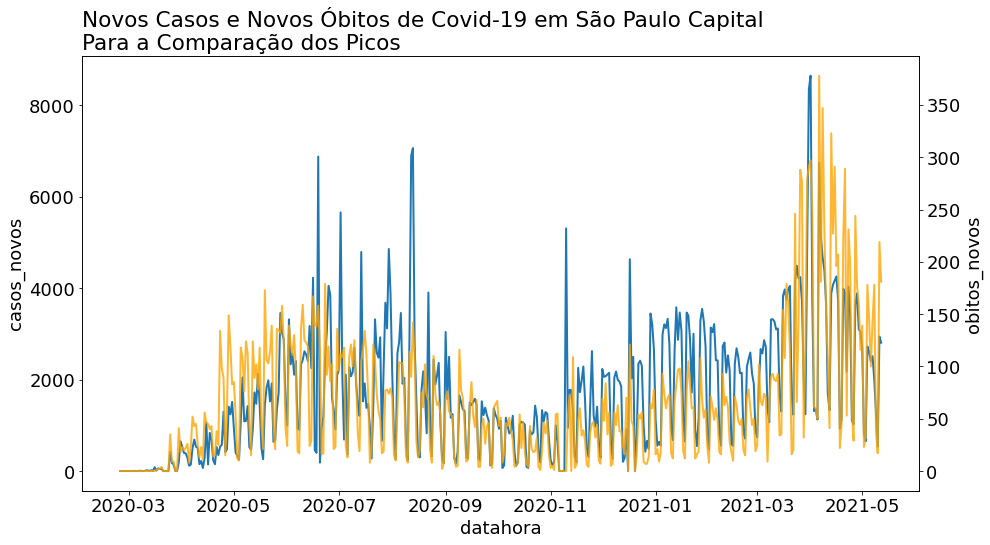

In [38]:
ax1 = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, linewidth = 2)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'obitos_novos', data = dados_sp, color = 'orange', linewidth = 2, alpha = 0.8)
plt.title('Novos Casos e Novos Óbitos de Covid-19 em São Paulo Capital\nPara a Comparação dos Picos', loc = 'left')
plt.show()

É um gráfico meio "lotado", mas dá pra enxergar que os picos dos dados não coincidem.

In [39]:
dados_202008 = dados_sp.query('mes == 8 & ano == 2020')
dados_202009 = dados_sp.query('mes == 9 & ano == 2020')

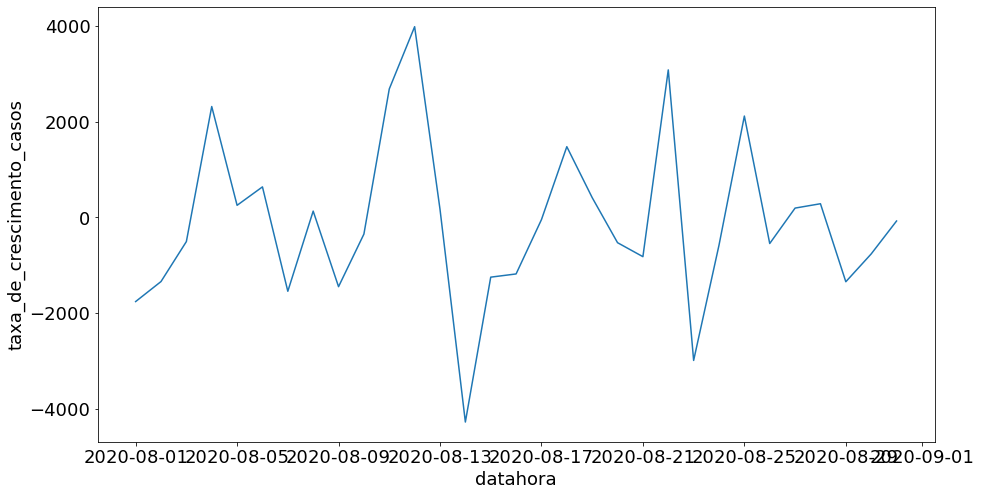

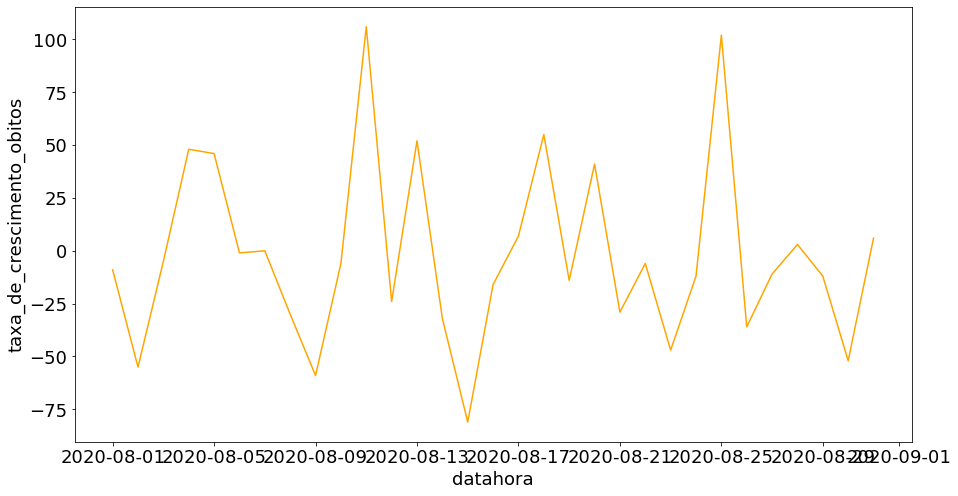

In [40]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_202008)
plt.show()
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_202008, color = 'orange')
plt.show()

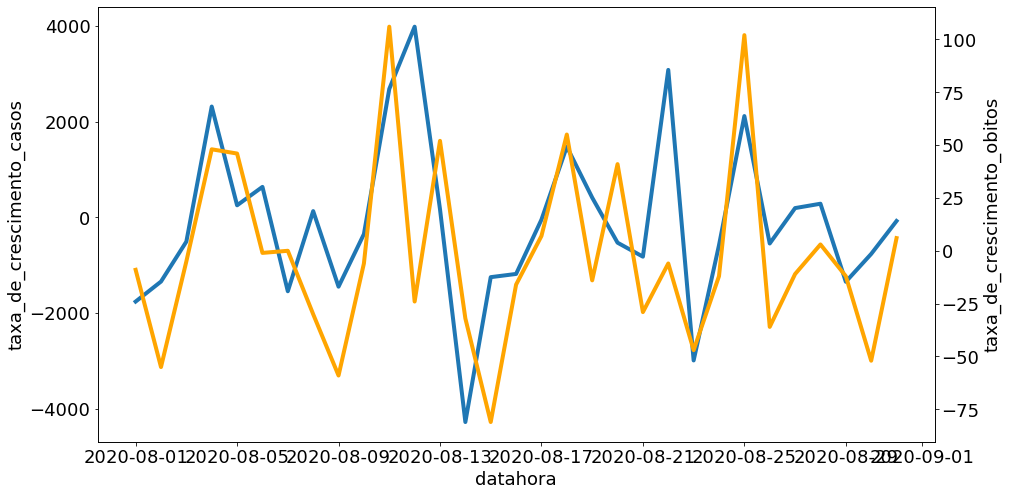

In [41]:
ax1 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_202008, linewidth = 4)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_202008, linewidth = 4, color = 'orange')

O gráfico acima foi feito para tentarmos checar se os picos nos números de casos e no número de óbitos coincidem. Escolhemos o mês de agosto de 2008.

Alguns podem sim coincidir, mas no geral isso não ocorre, pois os dados dos óbitos são inseridos na base de dados em datas diferentes dos dados sobre os casos.

## Desafio 03: Fazer melhorias nos gráficos.

- Adicionar título;
- Adicionar labels;
- Etc.

Feito em alguns gráficos anteriores.

## Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

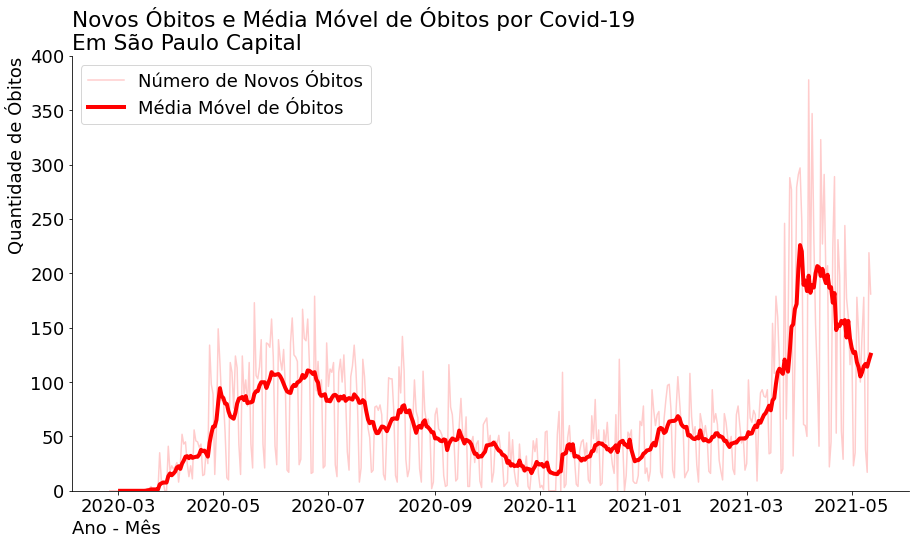

In [42]:
sns.lineplot(x = 'datahora', y = 'obitos_novos', data = dados_sp, alpha = 0.2, linewidth = 1.5, label = 'Número de Novos Óbitos', color = 'red')
sns.lineplot(x = 'datahora', y = 'media_movel_obitos', data = dados_sp, linewidth = 4, label = 'Média Móvel de Óbitos', color = 'red')
plt.title('Novos Óbitos e Média Móvel de Óbitos por Covid-19\nEm São Paulo Capital', loc = 'left')
sns.despine()
plt.xlabel('Ano - Mês', loc = 'left')
plt.ylabel('Quantidade de Óbitos', loc = 'top')
plt.ylim(0, 400)
plt.legend()
plt.show()

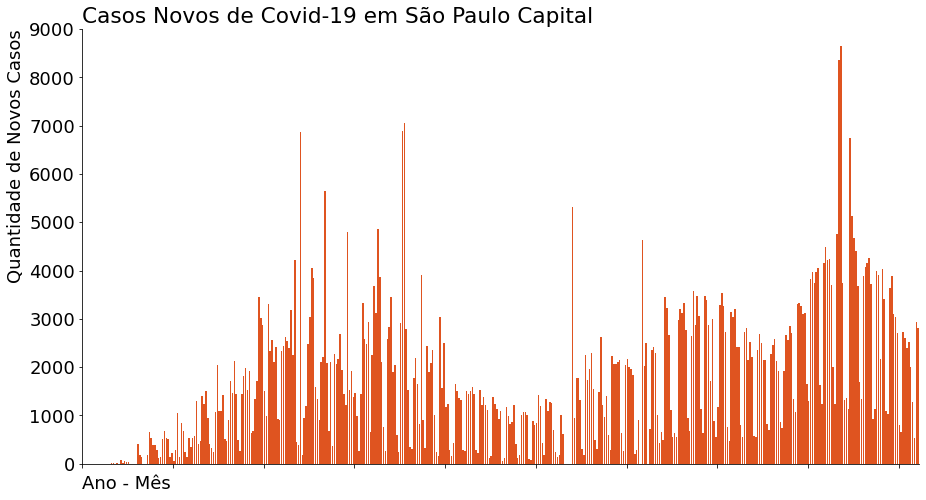

In [43]:
from matplotlib.dates import DateFormatter


ax = sns.barplot(x = 'datahora', y = 'casos_novos', data = dados_sp, color = 'orangered')
plt.title('Casos Novos de Covid-19 em São Paulo Capital', loc = 'left')
plt.xlabel('Ano - Mês', loc = 'left')
plt.ylabel('Quantidade de Novos Casos', loc = 'top')
sns.despine()
plt.xticks(rotation = 0)
#date_form = DateFormatter("%y-%m")
plt.ylim(0, 9000)
#plt.xlim("2020-02-25", "2021-05-31")
#ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 48, offset = 0))
plt.show()

## Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

Para isso utilizaremos a função ```shift``` do ```pandas``` que já realiza essa operação automaticamente.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [44]:
dados_sp['obitos_7_dias_antes'] = dados_sp['obitos_novos'].shift(-7) 

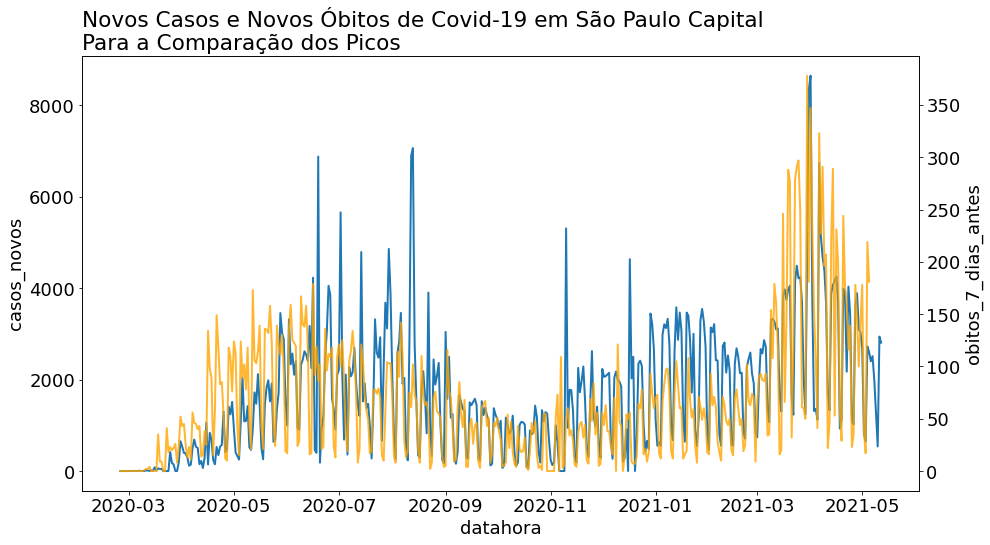

In [45]:
ax1 = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, linewidth = 2)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'obitos_7_dias_antes', data = dados_sp, color = 'orange', linewidth = 2, alpha = 0.8)
plt.title('Novos Casos e Novos Óbitos de Covid-19 em São Paulo Capital\nPara a Comparação dos Picos', loc = 'left')
plt.show()

Aqui os picos ficaram de casos e óbitos ficaram mais próximos.

In [46]:
dados_sp['obitos_6_dias_antes'] = dados_sp['obitos_novos'].shift(-6) 

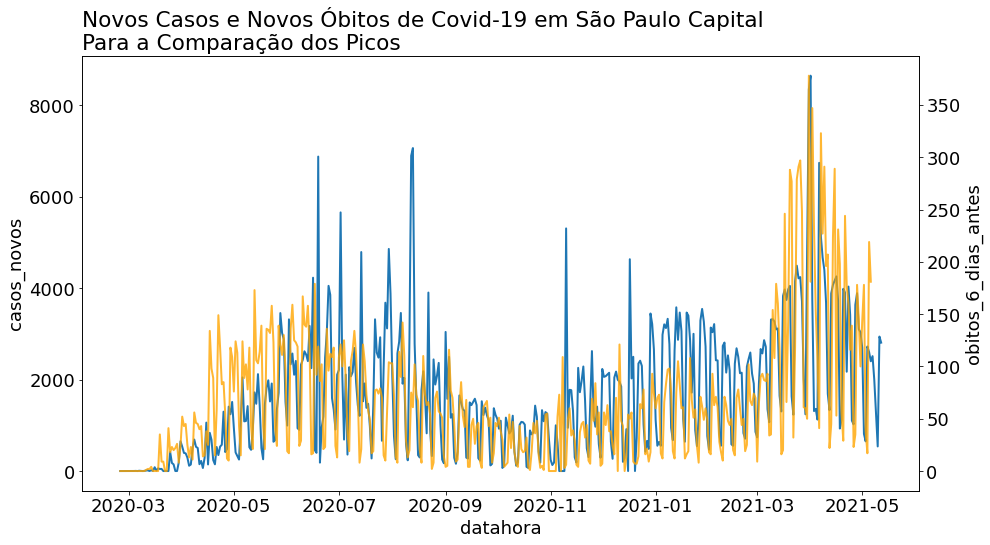

In [47]:
ax1 = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, linewidth = 2)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'obitos_6_dias_antes', data = dados_sp, color = 'orange', linewidth = 2, alpha = 0.8)
plt.title('Novos Casos e Novos Óbitos de Covid-19 em São Paulo Capital\nPara a Comparação dos Picos', loc = 'left')
plt.show()

Olhando para o maior pico de ambas as linhas, agora eles estão melhor encaixados, após realizarmos um _shift_ de 6 dias no valor de novos óbitos.

## Desafio 06: Função de correlação cruzada dos óbitos e casos.

In [48]:
# transforma as Series do pandas em arrays do numpy
casos = dados_sp['casos_novos'].to_numpy()
obitos = dados_sp['casos_novos'].to_numpy()

- https://numpy.org/doc/stable/reference/generated/numpy.correlate.html

In [49]:
# calcula a correlação entre os dois arrays
corr_casos_obitos = np.correlate(casos, obitos, 'full')

<AxesSubplot:>

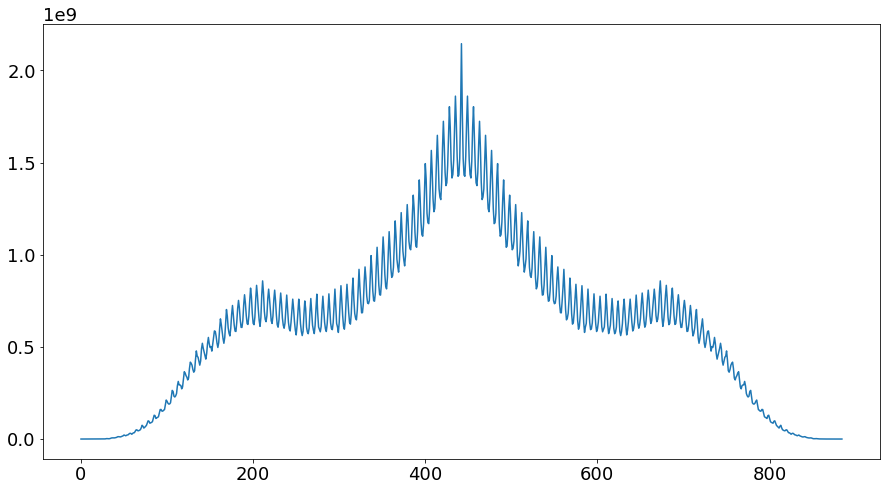

In [50]:
# plota a o resultado
pd.Series(corr_casos_obitos).plot()

O gif abaixo retrata bem o que significa a correlação em função do lag. [Fonte](https://robosub.eecs.wsu.edu/wiki/ee/hydrophones/start)

![](https://robosub.eecs.wsu.edu/wiki/lib/exe/fetch.php?tok=aa8260&media=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FVVPKOXc6aY1Lq%2Fsource.gif)

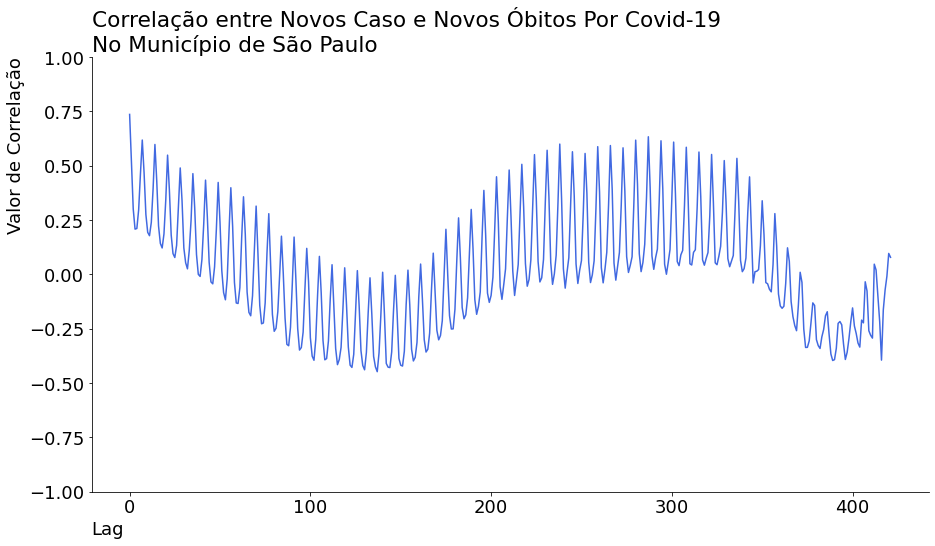

In [51]:
correlacao_obitos_casos = [dados_sp['casos_novos'].corr(dados_sp['obitos_novos'].shift(t)) for t in range(0, len(dados_sp))]
lag = range(0, len(dados_sp))
sns.lineplot(x = lag, y = correlacao_obitos_casos, color = 'royalblue')
plt.ylim(-1, 1)
plt.title('Correlação entre Novos Caso e Novos Óbitos Por Covid-19\nNo Município de São Paulo', loc = 'left')
plt.xlabel('Lag', loc = 'left')
plt.ylabel('Valor de Correlação', loc = 'top')
sns.despine()
plt.show()

O gráfico acima é basicamente a "metade" do gráfico anterior a ele.

**Qual valor nos deu a maior correlação?**

In [52]:
# iremos descartar o valor 0, pois ele é o máximo
correlacao_obitos_casos.index(max(correlacao_obitos_casos[1:]))

287

## Desafio 07: Estudar outros municípios.

## O Que Aprendemos

# Aula 02 - Primeiras Previsões com Prophet

In [149]:
df = pd.DataFrame()

In [150]:
df['ds'] = dados_sp['datahora'][:400]

In [151]:
df['y'] = dados_sp['casos_novos'][:400]

In [152]:
modelo = Prophet()

In [153]:
modelo.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
dataframefuturo = modelo.make_future_dataframe(periods = 43)

In [155]:
previsao = modelo.predict(dataframefuturo)

In [156]:
previsao.head()

ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2020-02-25 -122.523348  -760.810293  1402.134567  -122.523348  -122.523348   
1 2020-02-26 -104.913020  -702.330781  1452.216919  -104.913020  -104.913020   
2 2020-02-27  -87.302691  -537.451127  1605.580817   -87.302691   -87.302691   
3 2020-02-28  -69.692363  -802.001278  1352.960511   -69.692363   -69.692363   
4 2020-02-29  -52.082035 -1046.286920  1113.972256   -52.082035   -52.082035   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      457.824298            457.824298            457.824298  457.824298   
1      456.403784            456.403784            456.403784  456.403784   
2      595.693301            595.693301            595.693301  595.693301   
3      340.583780            340.583780            340.583780  340.583780   
4       59.118192             59.118192             59.118192   59.118192   

   weekly_lower  weekly_upper  multiplicative_terms  \
0    457.824298    457.824298                   0.0   
1    456.403784    456.403784                   0.0   
2    595.693301    595.693301                   0.0   
3    340.583780    340.583780                   0.0   
4     59.118192     59.118192                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  335.300950  
1                         0.0                         0.0  351.490764  
2                         0.0                         0.0  508.390609  
3                         0.0                         0.0  270.891417  
4                         0.0                         0.0    7.036157

In [157]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

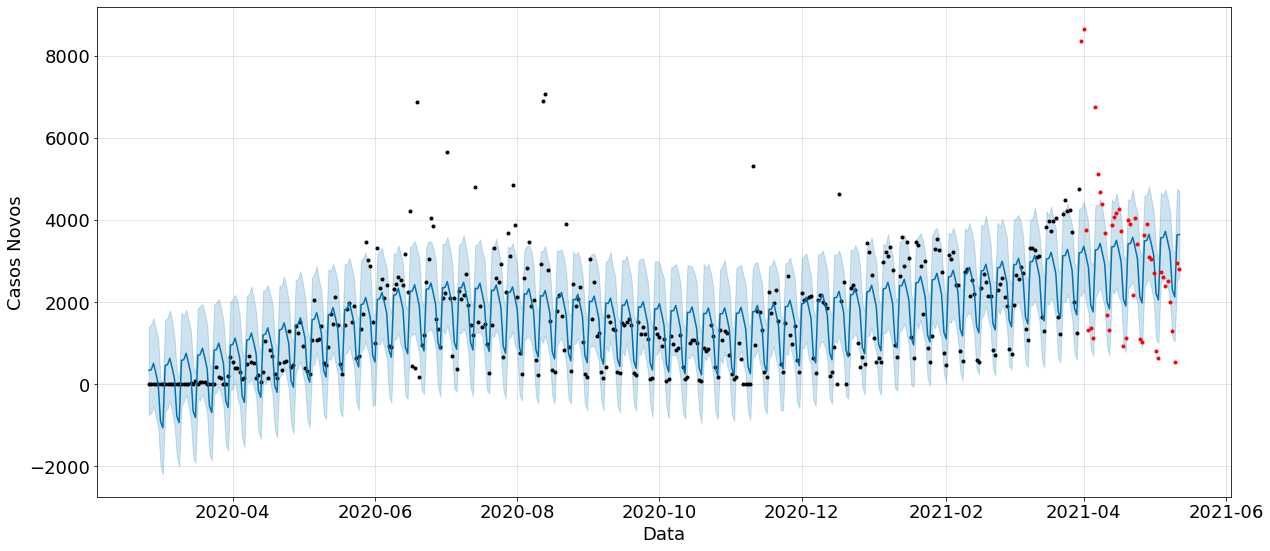

In [158]:
modelo.plot(previsao, xlabel = 'Data', ylabel = 'Casos Novos', figsize = (18, 8));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

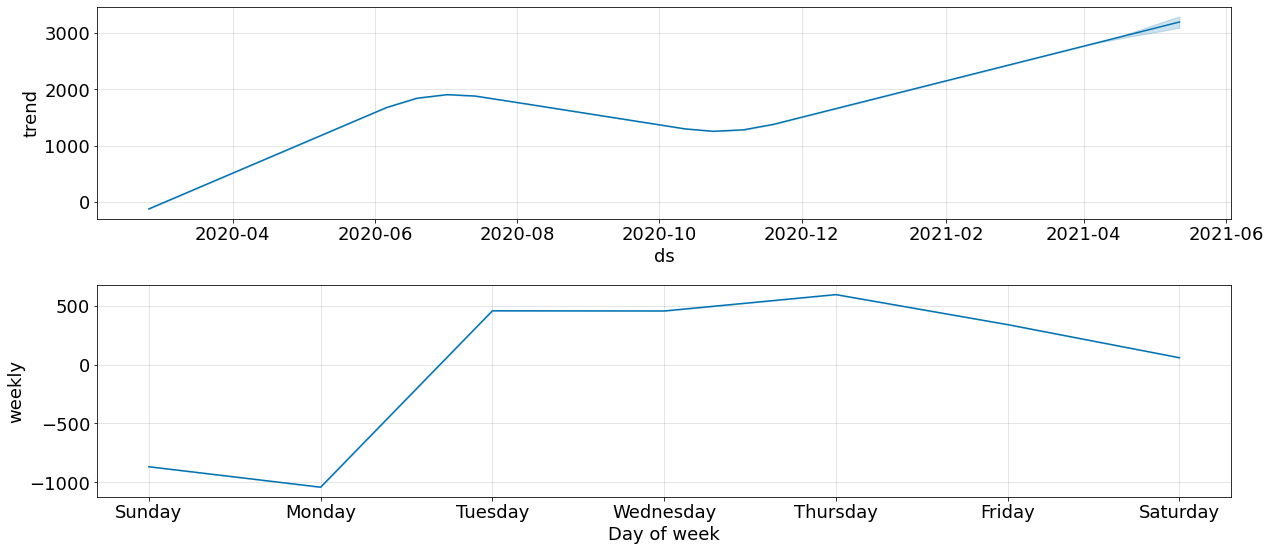

In [98]:
modelo.plot_components(previsao, figsize = (18, 8));

## Desafio 08: Mudar os períodos de previsão.

## Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.

- https://facebook.github.io/prophet/docs/quick_start.html#python-api

## Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados.

In [145]:
df_acumulados = pd.DataFrame()
df_acumulados['ds'] = dados_sp['datahora'][8:400]
df_acumulados['y'] = dados_sp['casos_novos'][8:400].cumsum()

In [146]:
modelo_acumulados = Prophet()
modelo_acumulados.fit(df_acumulados)
df_futuro_acumulados = modelo_acumulados.make_future_dataframe(periods = 43)
previsao_acumulados = modelo_acumulados.predict(df_futuro_acumulados)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [147]:
df_acumulados_teste = pd.DataFrame()
df_acumulados_teste['ds'] = dados_sp['datahora'][400:]
a = dados_sp['casos_novos'].cumsum()
df_acumulados_teste['y'] = a[400:]

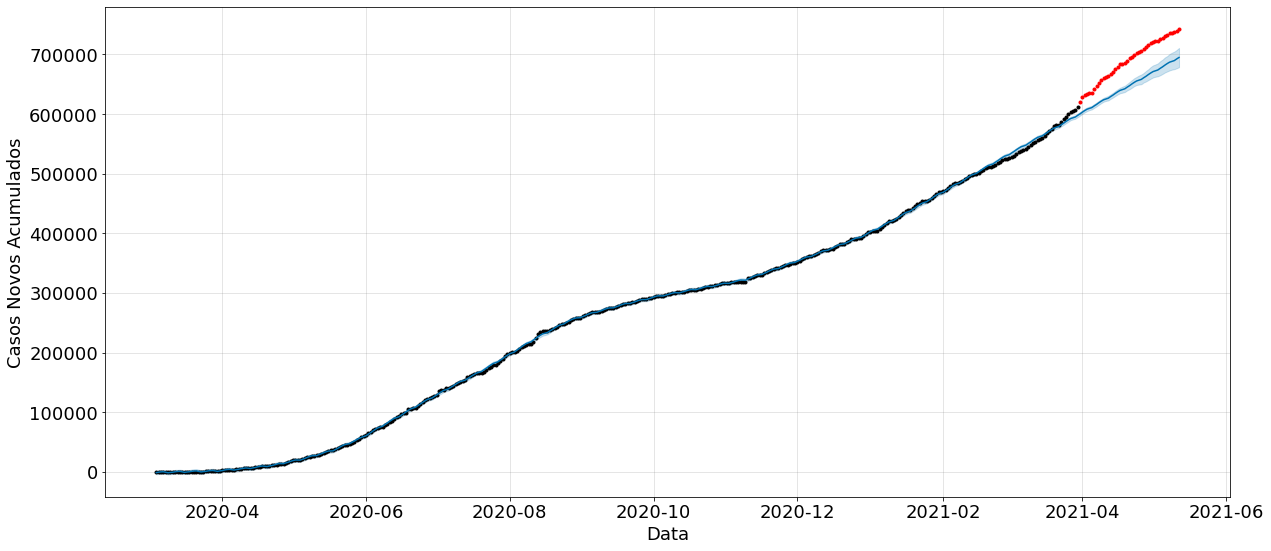

In [148]:
modelo_acumulados.plot(previsao_acumulados, xlabel = 'Data', ylabel = 'Casos Novos Acumulados', figsize = (18, 8));
plt.plot(df_acumulados_teste['ds'], df_acumulados_teste['y'], '.r')

## O Que Aprendemos
- Vimos as primeiras previsões com o PROPHET;
- Fizemos a decomposição de séries temporais.

# Aula 03 - Mudança de Tendência e Changepoints

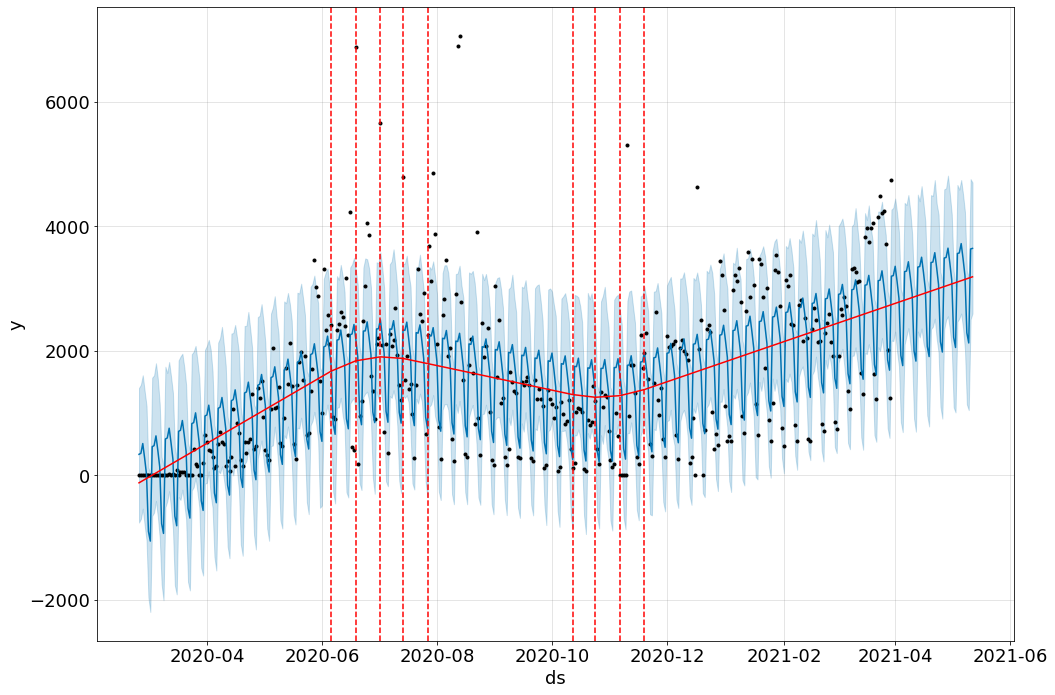

In [159]:
fig = modelo.plot(previsao, figsize = (15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


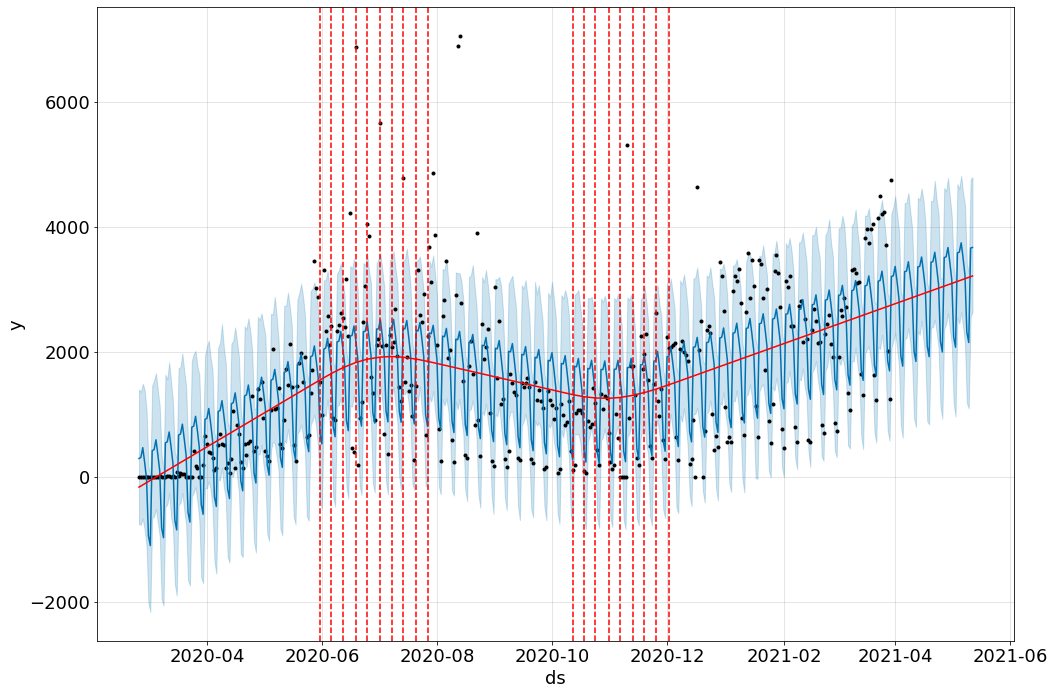

In [164]:
modelo = Prophet(n_changepoints = 50)
modelo.fit(df)
df_futuro = modelo.make_future_dataframe(periods = 43)
previsao = modelo.predict(dataframefuturo)

df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

fig = modelo.plot(previsao, figsize = (15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


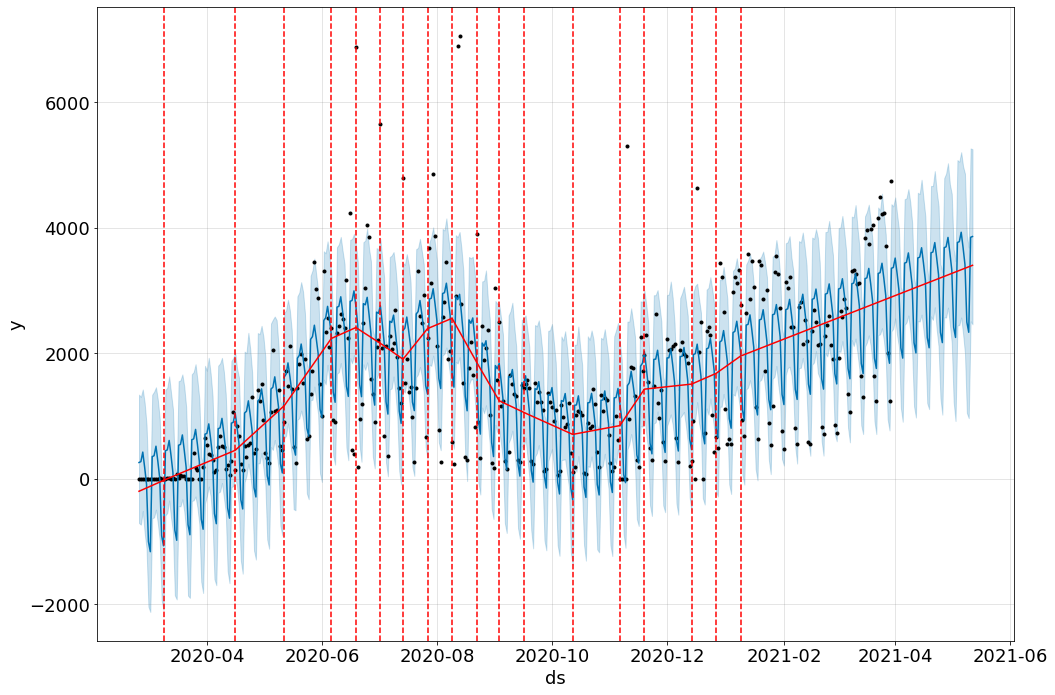

In [165]:
modelo = Prophet(n_changepoints = 25, changepoint_prior_scale = 10.0)
modelo.fit(df)
df_futuro = modelo.make_future_dataframe(periods = 43)
previsao = modelo.predict(dataframefuturo)

#df_teste = pd.DataFrame()
#df_teste['ds'] = dados_sp['datahora'][400:]
#df_teste['y'] = dados_sp['casos_novos'][400:]

fig = modelo.plot(previsao, figsize = (15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


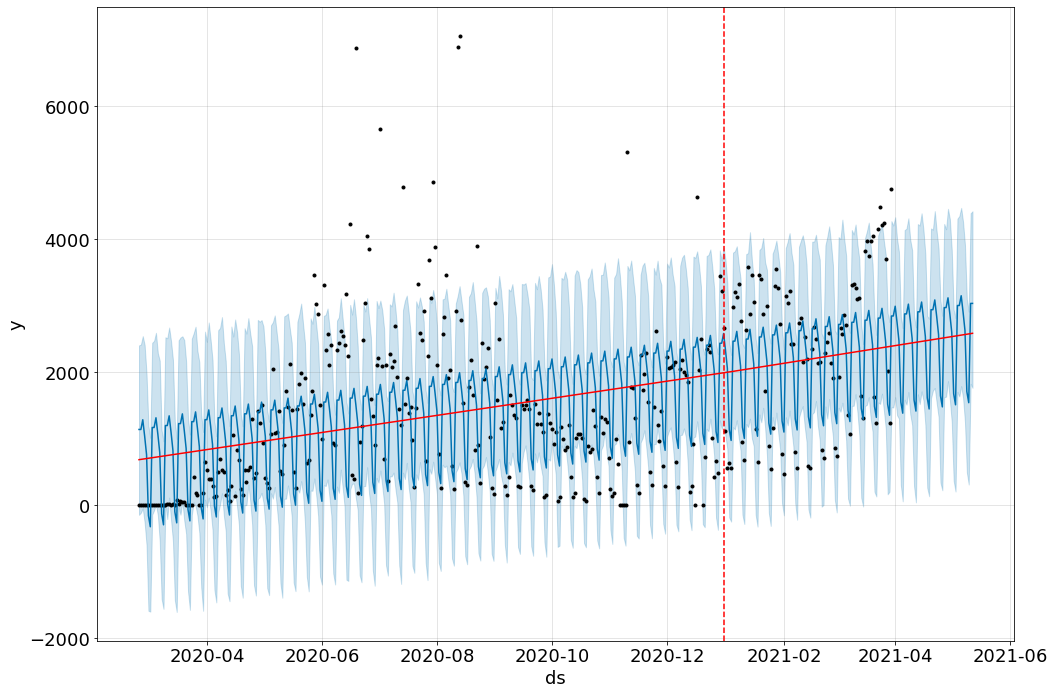

In [166]:
modelo = Prophet(changepoints = ['2020-12-31'])
modelo.fit(df)
df_futuro = modelo.make_future_dataframe(periods = 43)
previsao = modelo.predict(dataframefuturo)

#df_teste = pd.DataFrame()
#df_teste['ds'] = dados_sp['datahora'][400:]
#df_teste['y'] = dados_sp['casos_novos'][400:]

fig = modelo.plot(previsao, figsize = (15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 11: Identificar potenciais changepoints.

## Desafio 12: Desenvolver uma função roda o modelo automaticamente.

## O Que Aprendemos
- Curva com o crescimento logístico;
- Mudança de tendência em uma série temporal;
- Como decidir se houve mudança de tendência através de um gráfico de barras.

# Aula 04 - Feriados e Sazonalidades nas Séries Temporais

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


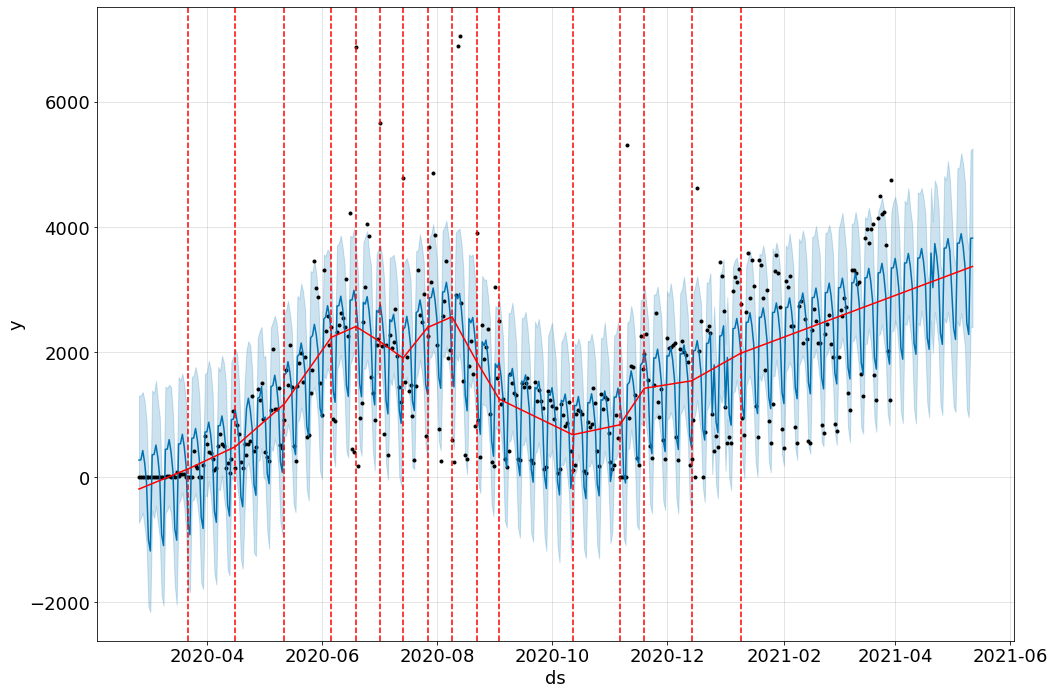

In [170]:
modelo = Prophet(changepoint_prior_scale = 10)
modelo.add_country_holidays('BR')
modelo.fit(df)
df_futuro = modelo.make_future_dataframe(periods = 43)
previsao = modelo.predict(dataframefuturo)

#df_teste = pd.DataFrame()
#df_teste['ds'] = dados_sp['datahora'][400:]
#df_teste['y'] = dados_sp['casos_novos'][400:]

fig = modelo.plot(previsao, figsize = (15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [171]:
#Usando feriados especificos do municipio de SP

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020',
                                 'ds': pd.to_datetime(feriados_sp_2020)})

feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021',
                                 'ds': pd.to_datetime(feriados_sp_2021)})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [172]:
# Usando os feriados do município de SP

modelo_feriados = Prophet(n_changepoints = 25, changepoint_prior_scale = 10.0, holidays = feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods = 36)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


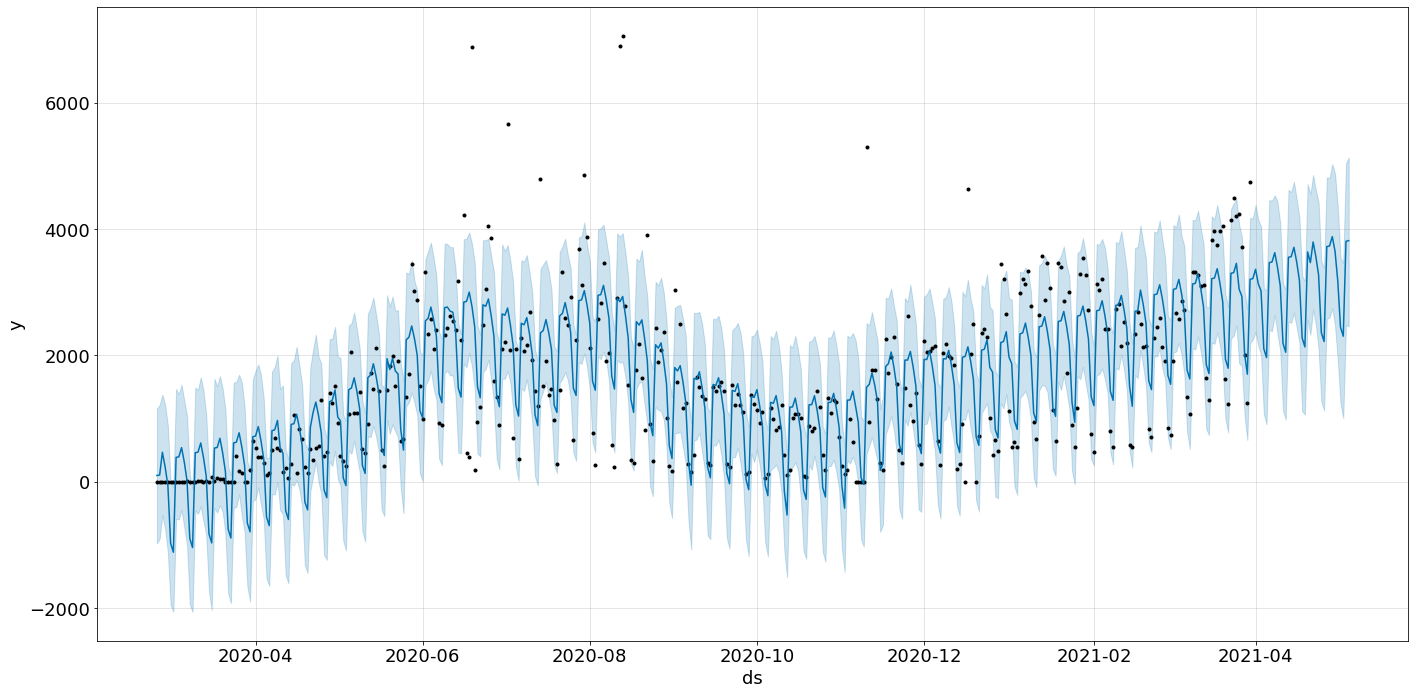

In [173]:
fig = modelo_feriados.plot(previsao, figsize=(20,10));

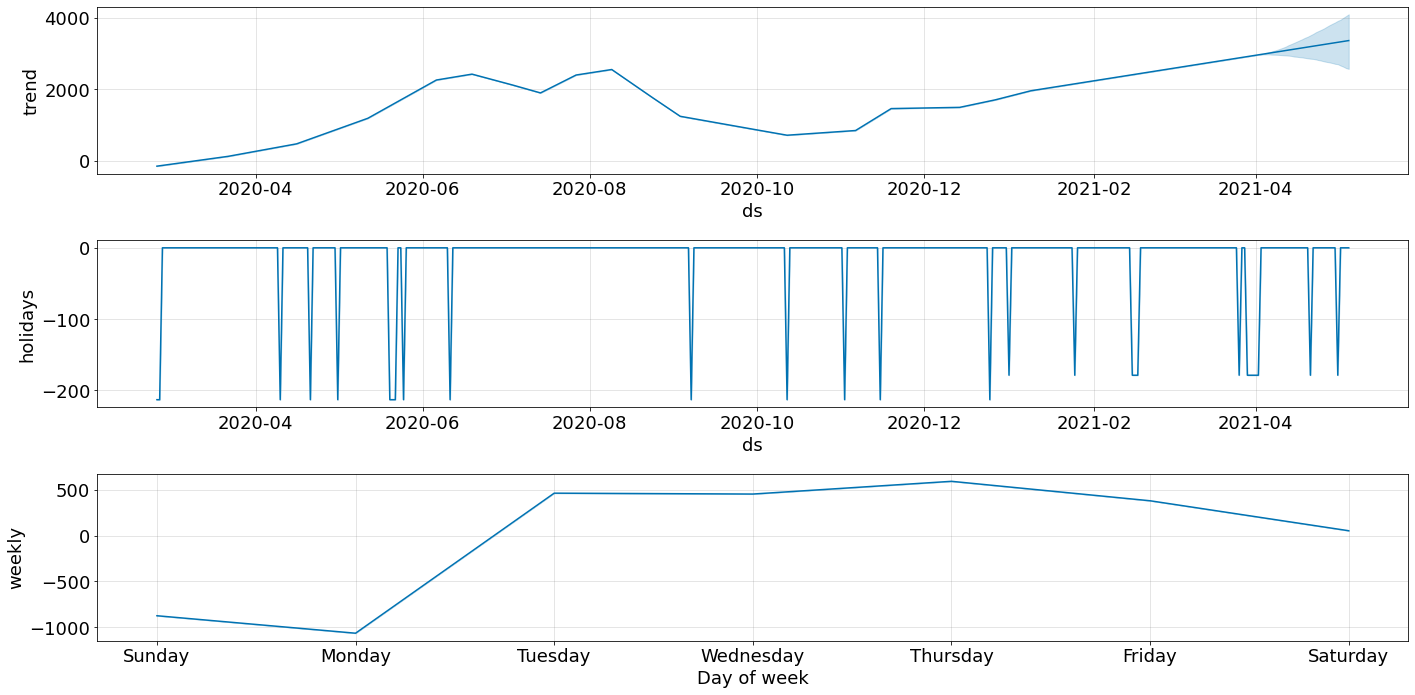

In [175]:
modelo.plot_components(previsao, figsize = (20,10));

In [176]:
modelo = Prophet(n_changepoints = 25,
                 changepoint_prior_scale = 10.0,
                 seasonality_mode = 'multiplicative',
                 holidays = feriados, weekly_seasonality = 7)
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


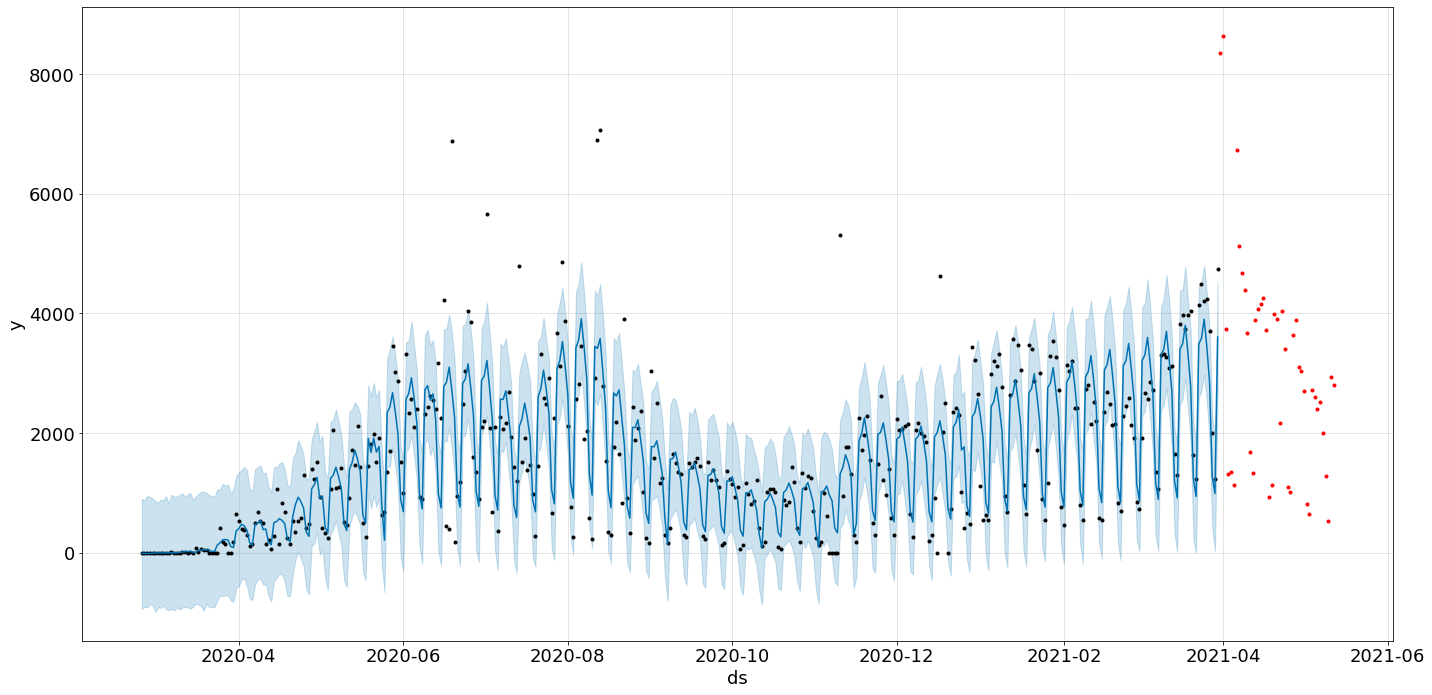

In [177]:
fig = modelo.plot(previsao, figsize = (20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [182]:
mean_absolute_error(df['y'],previsao['yhat'])

449.9122557305542

## Desafio Extra: Utilizar outras métricas do Scikit-Learn e comparar os resultados.

## O Que Aprendemos
- Efeito da sazonalidade e feriados em uma série temporal;
- Sazonalidade aditiva e sazonalidade multiplicativa;
- Previsões considerando sazonalidade e feriados com o PROPHET.

## Aula 05 - Outliers e Validação

In [183]:
novo_y = df.reset_index()

In [184]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower']) & (novo_y['y'] < previsao['yhat_upper'])]

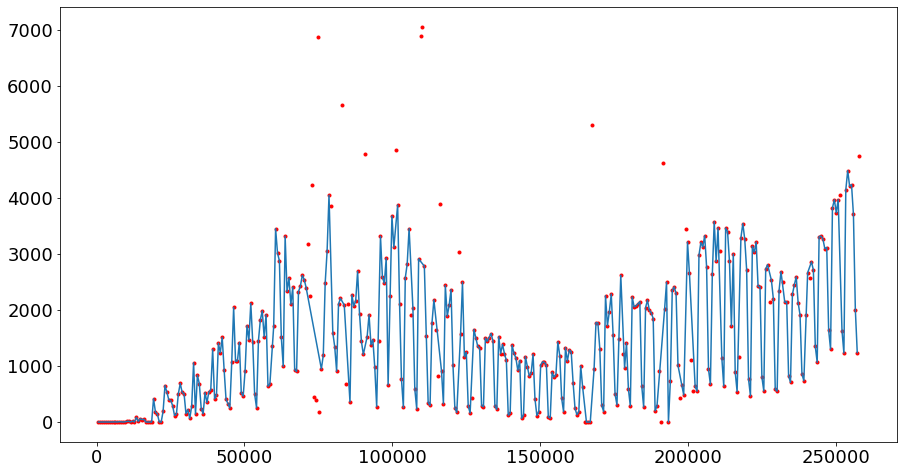

In [185]:
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [186]:
df_sem_outliers = sem_outliers[['ds','y']]

In [187]:
modelo = Prophet(n_changepoints = 25,
                 changepoint_prior_scale = 10.0,
                 seasonality_mode = 'multiplicative',
                 holidays = feriados,
                 weekly_seasonality = 7)

modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods = 0)
previsao = modelo.predict(dataframefuturo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


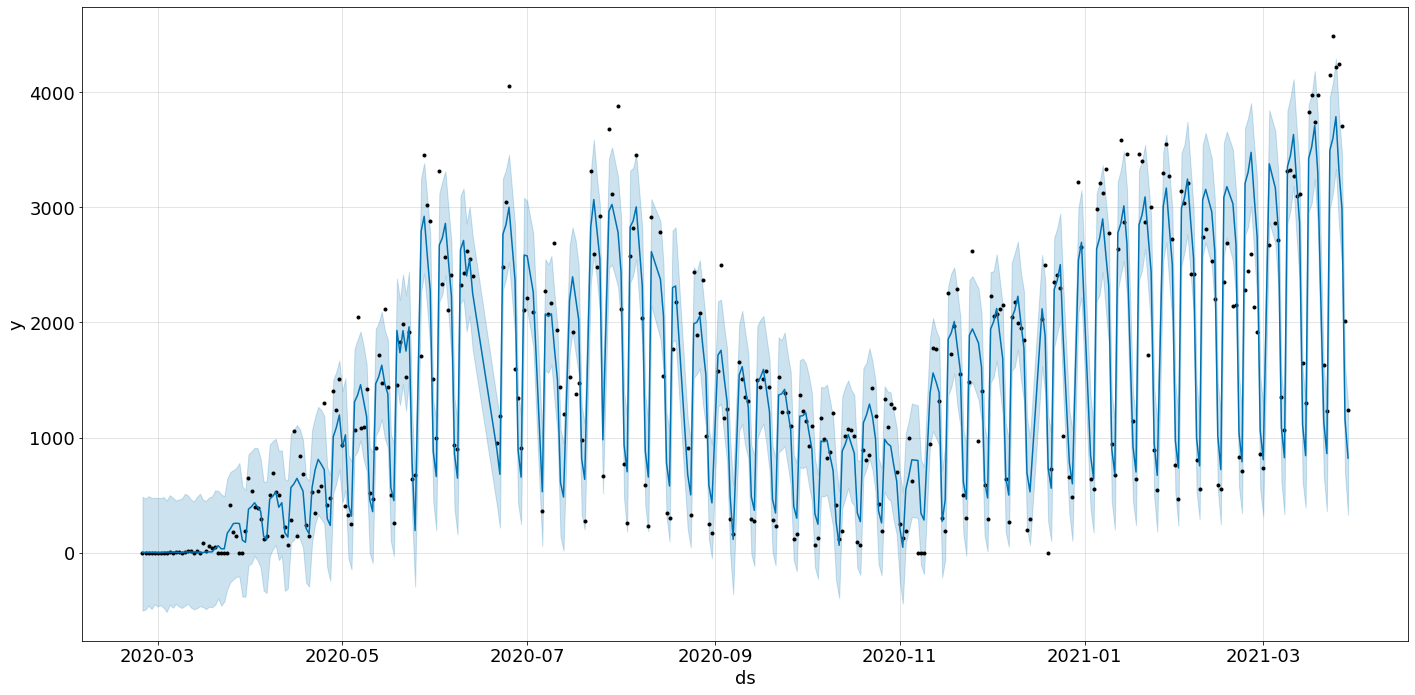

In [188]:
fig = modelo.plot(previsao, figsize = (20,10));

In [189]:
modelo = Prophet(interval_width = 0.80,
                 n_changepoints = 25,
                 changepoint_prior_scale = 10.0,
                 seasonality_mode = 'multiplicative',
                 holidays = feriados,
                 weekly_seasonality = 7)

modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods = 30)
previsao = modelo.predict(dataframefuturo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


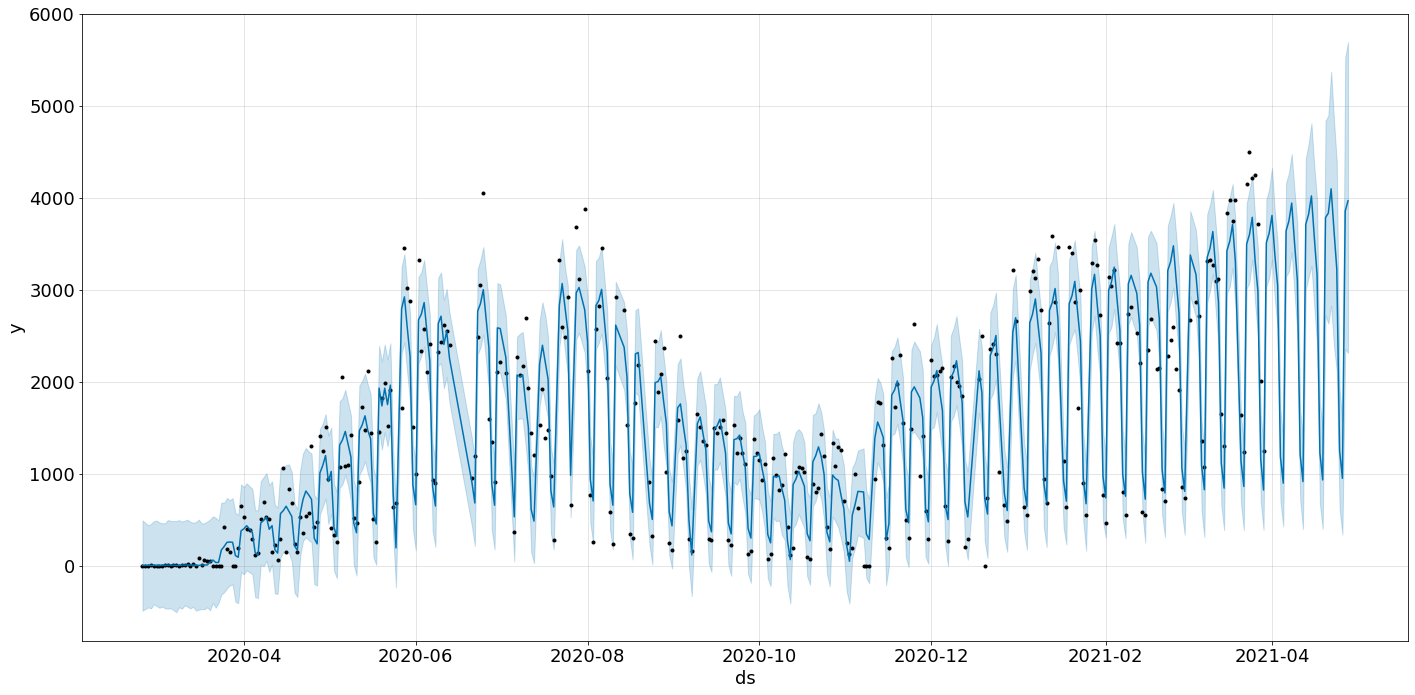

In [190]:
fig = modelo.plot(previsao, figsize = (20,10));

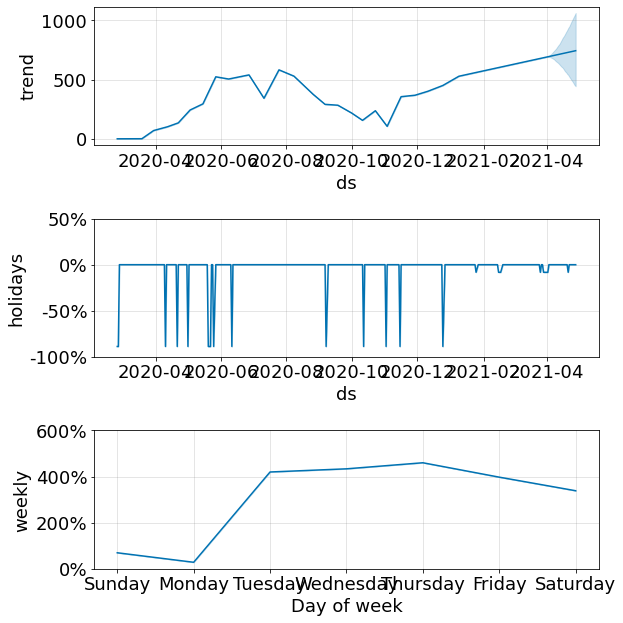

In [192]:
modelo.plot_components(previsao);

In [193]:
amostras = modelo.predictive_samples(previsao)

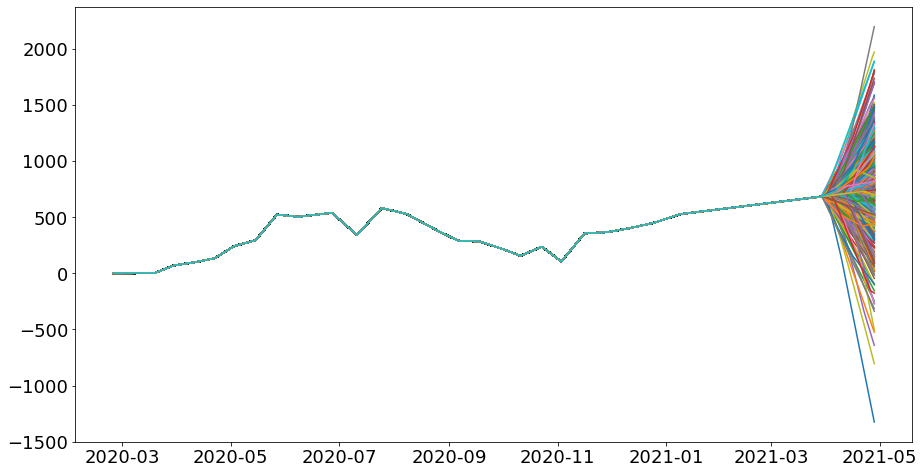

In [194]:
plt.plot(previsao['ds'], amostras['trend']);

In [199]:
df_cv = cross_validation(modelo, initial = '180 days', period = '30 days', horizon = '30 days')

INFO:prophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [200]:
df_cv['cutoff'].unique()

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [201]:
janela = 5

In [202]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

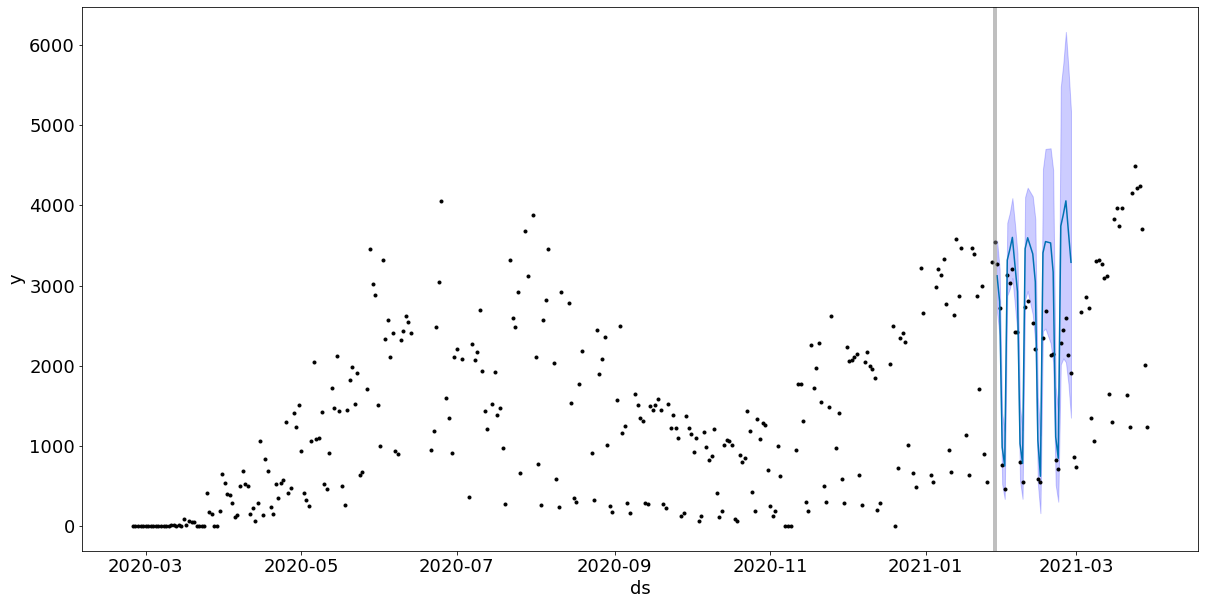

In [203]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls = '-', c = '#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color = 'blue',
                alpha = 0.2)
ax.axvline(x = pd.to_datetime(cutoff), c = 'gray', lw = 4, alpha = 0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [204]:
df_p = performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


In [206]:
df_p.head()

horizon            mse        rmse         mae     mdape     smape  coverage
0  4 days  114357.123934  338.167302  269.525118  0.212866  0.312162  0.833333
1  5 days  104805.049952  323.736081  263.683932  0.220046  0.338864  0.879699
2  6 days  127184.049798  356.628728  294.877106  0.223472  0.375820  0.842105
3  7 days   79109.083571  281.263370  238.037249  0.120865  0.243468  0.947368
4  8 days  166686.261835  408.272289  341.120420  0.167767  0.364209  0.736842

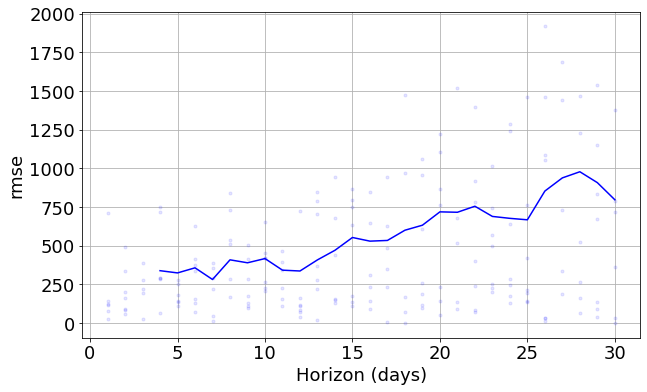

In [208]:
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

## Desafio 13: Testar diferentes intervalos de confiança.

## Desafio 14: Buscar quais métricas se aplicam a quais casos.

## O Que Aprendemos
- Tratamento de outliers;
- Intervalo de confiança;
- Validação cruzada de encadeamento direto;
- Métricas de performance.